<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>


**[Working with Missing Data in Pandas](https://pandas.pydata.org/docs/user_guide/missing_data.html)**

Missing Data can occur when no information is provided for one or more items or for a whole unit. Missing Data is a very big problem in a real-life scenarios. Missing Data can also refer to as NA (an acronym for Not Available) values in Pandas. In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. 

**[When and Why Is Data Missed?](https://www.tutorialspoint.com/python_pandas/python_pandas_missing_data.htm)**

Let us consider an online survey where different users being surveyed for a product. Many a times, people do not share all the information related to them. For Example, different users being surveyed may choose not to share their income, some users may choose not to share the address. Few people share their experience, but not how long they are using the product; few people share how long they are using the product, their experience but not their contact information. Thus, in some or the other way a part of data is always missing, and this is very common in real time.


**[Missing Value Handling Methods](https://becominghuman.ai/imputing-missing-values-f00a770d9cc4)**

- **``Delete all instances with at least a missing value``**: If you do this method then, the size of the dataset should be large enough to represent the population without those instances.<br>
- **``Recover redoing the experiment or contacting the subject``**: This is one of the high-cost methods to recover the values, redoing an experiment takes time and cost money, moreover if it's a public opinion kind of dataset, then acts like GDPR restrict future uses to contact the subject in some cases.<br>
- **``Domain Experts Guessing``**: By consulting the domain experts it is possible to guess the missing values with their experience but this method is a hectic and highly cost method due to the high hourly rates of experts.<br>
- **``Fill with mean``**: This is one of the easiest and most primary methods of imputing missing values, by filling each missing value with the average of the attribute. This is not always good to use because it reduces the variability of the data but in some cases makes sense.<br>
- **``Fill with median``**: Similar to the above method the problem is it reduces the variability of the data. Moreover, if the missing values are distributed then it could increase the noise of the data as well.<br>
- **``Using Machine Learning algorithms``**: There are two different ways of using ML for imputation, first the multiple-regression analysis, by creating a regression equation using the rest of the data it is possible to predict missing values. This method needs more complete instances to train the model. Finally, the most common and popular method is the Multiple Imputation. where there are multiple missing values based on the correlations for the missing data and then averages the simulated datasets by incorporating random errors in your predictions

[YouTube Video Source: Python Pandas Tutorial: Handle Missing Data; fillna, dropna, interpolate](https://www.youtube.com/watch?v=EaGbS7eWSs0)<br>
[YouTube Video Source: Python Pandas Tutorial: Handle Missing Data; replace function](https://www.youtube.com/watch?v=XOxABiMhG2U)<br>
[YouTube Video Source: Handling Missing Values in Pandas Dataframe](https://www.youtube.com/watch?v=uDr67HBIPz8)

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [3]:
df = df0.copy()
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [188]:
df.groupby("status", dropna = False).mean()
# True olsaydı dropna, NaN degeri olmayacakti
# burdan bir diğer soru: neden var1 veya salary'nin meanini almadi. info ile bakalım

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [8]:
df.info()

# cunku her ikisine de object diyor
# status da 2 tire 1 NaN var; info 10 non-null dedigine gore info sadece NaN'ları non-null diyor.
# Yani NaN olmayan ama kullanamayagimiz degerler de var, bunlari da biz missing value kabul ediyoruz


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [9]:
# unique degerlere bakarak biraz daha bilgi elde ederiz.
df.groupby("status").value_counts(dropna=False)

# - bir numeric dtype degildir. bu nednele var1de oldugu gibi bir "-" olunca Object dtype yapiyor arrayi. (array tek tip data)
# df0 orjinalindeki np.nan'lar, df'e girerken object deger olarak nan olarak giriyor. o kucuk nan'lar object.
# ama eger buyuk N ile NaN ise floattır. var2de NaNlar var, bundan aldı meani.

status  id    gender  dept  var1  var2  salary
-       P003  M       AWS   5     5.0   59.0      1
        P008  F       FS    10    2.0   136.0     1
FT      P001  M       DS    2     8.0   NaN       1
        P004  F       AWS   nan   8.0   120.0     1
        P007  M       FS    nan   NaN   NaN       1
        P010  F       DS    -     7.0   125.0     1
PT      P002  F       FS    3     NaN   54.0      1
        P005  M       DS    7     11.0  58.0      1
        P006  F       NaN   1     NaN   75.0      1
        P009  M       NaN   14    3.0   60.0      1
dtype: int64

In [10]:
type(df.var1[3])

str

In [11]:
type(df.var2[1])

numpy.float64

In [12]:
# salarydeki "None"a bakalim
type(df.salary[6])

NoneType

In [13]:
type(np.nan)
# aslında bu float, ama aynı arrayde string olunca daha ustu dtype str oldugu icin onu da tektiplesiirp nan yapiyor

float

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**[Values considered “missing”](https://pandas.pydata.org/docs/user_guide/missing_data.html)**

As data comes in many shapes and forms, Pandas aims to be flexible with regard to handling missing data. While **``NaN``** is the **default missing value marker** for reasons of **computational speed and convenience**, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python **``None``** will arise and we wish to also consider that “missing” or “not available” or “NA”.

**In Pandas missing data is represented by two value:**

- **``None``**: None is a Python singleton object that is often used for missing data in Python code.
- **``NaN ``**: NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation

[Data Cleaning with Python and Pandas: Detecting Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)<br>
[8 Methods For Handling Missing Values With Python Pandas](https://towardsdatascience.com/8-methods-for-handling-missing-values-with-python-pandas-842544cdf891)<br>
[Missing values in pandas (nan, None, pd.NA)](https://note.nkmk.me/en/python-pandas-nan-none-na/)<br>
[Handling Missing Data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)<br>
[Practical Strategies to Handle Missing Values](https://towardsdatascience.com/practical-strategies-to-handle-missing-values-626f9c43870b)

In [14]:
pd.Series([1, np.nan, np.NaN, 2, None])
# dtype float olan bir seri. None'ın tipi yok, onu da floata cevirdi. ama float serinin datatipi burda,
# icindeki integerlar falan koruyor kendi tipini halen

0    1.0
1    NaN
2    NaN
3    2.0
4    NaN
dtype: float64

In [16]:
print(0 * np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)
# np.nan belirsiz deger oldugu icin bunlarla yapılan tum matematik islemlerin sonucu da nan olur.

nan
nan
nan
nan
nan


In [17]:
print(np.nan == np.nan)
# ikisi de belirsiz, birbirine esit mi bilinmez

False


In [19]:
print(10 > np.nan)  # bilemeyiz büyük mü, belirsiz
print(np.inf > np.nan)  # + sonsuz büyük mü , yine belirsiz
print(np.nan is np.nan)  # True. cunku "is" operatoru id degerini, memory locationunu sorgular, ikisi aynı oldugu icin T
print(id(np.nan))
print(0.3 == 3 * 0.1)

False
False
True
140335976817968
False


In [4]:
# örnek yapalım
df["salary"]
# icinde NaN ve None 2 tip null value var. salary d-tipi object


0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [5]:
# ilk NaN'ın tipine bakalım
df["salary"][0], type(df["salary"][0])

(nan, float)

In [6]:
df["salary"][6], type(df["salary"][6])

(None, NoneType)

In [7]:
type(df["salary"][1])

int

In [8]:
df.salary.dtype

dtype('O')

In [ ]:
# sadece NaN ve int'leer olsa serie dtype'ı flolat olurdu ama None Type da pldugu icin Object oldu.
# cleaning esnasinda belli tip seirlere yapilabilecek islemler degistgi icin serie tipi onemli
# örnegin str fonksiyonlarını uygulayamayız numerice, ya da vice versa

In [9]:
# status columnda da 2 tire var
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [10]:
df["status"][2], type(df["status"][2])

('-', str)

In [11]:
df["status"][10], type(df["status"][10])

(nan, float)

# nihai amac tüm NaNları float haline getirmek. bu nedenle missing valueları float NaN yapmalıyız

In [12]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [13]:
# burada ise nan arrayde np.nan floattı ama - nedeniyle str'ye cevrildi. 
df["var1"][3], type(df["var1"][3])

('nan', str)

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [14]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [15]:
df.info()
# non-null null olmayan, icinde deger olan demek. ama statusta örneğin 10 deger olsa da biz bunların tamamının
# kullanılamayacak degerler oldugunu gorduk. bunlar da islenmeli. dolayısıyla info'ya temkinli yaklaşırız

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [16]:
df.isnull()
# is ile baslayan metodlar sorgulama yapar ve T-F verir
# ama tire de olsa, boslk da olsa false donduruyor. None olanları trueya map ediyor.

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [17]:
# veya aynısı isna
df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [24]:
pd.isnull == pd.isna
# id'leri de aynı. neden 2 tane var: pandas dataframelerin arr diline dayanması sebep. arr dilinde na ve null 2 ayrı 
# değerler.

True

In [18]:
# bir de notnull ve notna var, o da null degerleri False verir, tam tersi 
df.notnull()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [19]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [20]:
df.isnull().any()
# any uygulandığı listede bir tane bile true varsa hepsini true döndürür. hepsi false ise false döndürür

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [21]:
df.any()
# default olarak axis 0. satırlara bakr bu halde.

id        True
gender    True
status    True
dept      True
var1      True
var2      True
salary    True
dtype: bool

In [22]:
df.isnull().all()
# all ise eger sutunun tamamı false oldugunda true verir 

id        False
gender    False
status    False
dept      False
var1      False
var2      False
salary    False
dtype: bool

In [23]:
df.isnull().sum()
# kacar tane hangi sutunda. ama halen NaN ve None'lara baktigina dikkat. tirelere ya da diger str'lere bakmıyor

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [24]:
df.isnull().sum().sum()
# toplam df'de kac tane oldugunu gormek icin

9

In [25]:
# salary tek sutununa bakalım
df.salary.isnull().any()

True

In [26]:
df.salary.isnull().sum()

3

In [27]:
# null degerlerin sutun icindeki yuzdelerini bulalım
round((df.isnull().sum() / len(df0)) * 100, 2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [28]:
# len df yerine shape de kullanabiliriz
round((df.isnull().sum() / df.shape[0]) * 100, 2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [29]:
# satırlar bazında kac null deger olduguna bakalım: axisle oynarız
df.isnull().any(axis=1)


0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [30]:
# bu satırları gormek istersek
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [32]:
# icinde null olmayanları bulmak istersek tilde kullanırız
df[~df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [33]:
# tamamı null olan satırları tespit icin
df.isnull().all(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [34]:
# spesifik bir sutunu kontrol edelim nul degerler icin
df.loc[df.salary.isnull()]
# loc ile bir kriter koyduk. salary sutununda "null deger olan satırları" getir dedik. burda digerleri dolu olsa da,
# salary sutunu onemli olan.

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [35]:
# acaba departmeni null olanların salaryleri nasıl

df.loc[df.dept.isnull(), ["salary"]]

,salary
5,75
8,60


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [36]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [37]:
# var 1 sutunundaki tire'yi NaN yapalım
df["var1"].map({"-":np.nan})
# tamamını NaN yapar map. dictionary'de eger ger kalanların ne olmasi gerektigini belrtmiyorsa, key'de gormedigi 
# tüm degerler icin NaN döndürür.

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [39]:
# bu nedenle map yerine "pandas packageındaki" replace'i kullanırız
df["var1"].replace("-", np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

**replace docstr**

df0.replace(

    to_replace=None,
    
    value=<no_default>,
    
    inplace: 'bool' = False,
    
    limit=None,
    
    regex: 'bool' = False,
    
    method: 'str | lib.NoDefault' = <no_default>,
)
Docstring:
Replace values given in `to_replace` with `value`.

Values of the DataFrame are replaced with other values dynamically.

This differs from updating with ``.loc`` or ``.iloc``, which require
you to specify a location to update with some value.



In [38]:
type(df.var1[9])
# ama istedigimiz gibi float olmamis
# cunku dtype(var1) object oldugu icin onu da str yaptı
# komple tüm sutunu flaoat yapmamız lazım. bunun icin de stype

str

# .astype("float")

In [40]:
df["var1"].replace(to_replace="-", value=np.nan).astype("float")
# küçük nan'lar da buyuk Nan oldu, rakamlar da float oldu. arada gozden kacan bir str varsa hata verir ama.
# böylece hala degistirlmesi gereken bir eleman olup olmadigini da anlamis oluruz

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [41]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [42]:
# birden fazla elemanı aynı anda nan'a replace
df["var1"].replace(["-", "nan"], np.nan, inplace=True)
# yine astype unutma. kalıcı olması icin inplace= True

In [43]:
df["var1"] = df.var1.astype("float")
df["var1"]
# dtype float

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [44]:
# status sutununa bakalım simdi
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [45]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]
# strler oldugu icin object kalmasi gerekyor, numeric degil, float yapilmaz

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [47]:
# pek map nasıl bir yerde uygulanır: gender sutunu gibi az keyleri olanlarda
df["gender"].map({"M":0, "F":1})

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [49]:
# ama bu kalıcı olmadı. kalıcı olması icin replace ve inplace:
df["gender"].replace({"M":0, "F":1}, inplace=True)
# veya
# df0["gender"].replace(["M","F"], [0,1], inplace=True)
df.gender

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [46]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [50]:
# herhangi bir saturda nan varsa düsür
df.dropna(axis=0, how = "any", thresh = None, inplace = False)

,id,gender,status,dept,var1,var2,salary
4,P005,0,PT,DS,7.0,11.0,58


In [51]:
df.dropna(axis=1, how = "any", thresh = None, inplace = False)

,id,gender
0,P001,0
1,P002,1
2,P003,0
3,P004,1
4,P005,0
5,P006,1
6,P007,0
7,P008,1
8,P009,0
9,P010,1


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [52]:
# eğer sutunu tamamı missing value ise sil
df.dropna(axis=1, how = "all", thresh = None, inplace = False)

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [53]:
df.dropna(axis=1, how = "all", inplace = False)
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [54]:
# thresh kullanınca any ve all gecerliligini yitiriyor. sart koyuyoruz. 
#thresh= nan olmayan değerleri sayar eğer girdiğimiz sayıdan fazla değer var ise sütunu atmaz.
# thresh varsa how!a gerek yok
df.dropna(axis=1, thresh = 9, inplace = False)
df
# thresh: thresh takes integer value which tells minimum amount of na values to drop.

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [55]:
df.drop([1,3,5])
# bu satırları düşürür

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
2,P003,0,NaN,AWS,5.0,5.0,59
4,P005,0,PT,DS,7.0,11.0,58
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125
10,P011,0,NaN,AWS,6.0,9.0,NaN


In [56]:
# sütun dusureceksek
df.drop(["var1", "var2"], axis = 1)

,id,gender,status,dept,salary
0,P001,0,FT,DS,NaN
1,P002,1,PT,FS,54
2,P003,0,NaN,AWS,59
3,P004,1,FT,AWS,120
4,P005,0,PT,DS,58
5,P006,1,PT,None,75
6,P007,0,FT,FS,None
7,P008,1,NaN,FS,136
8,P009,0,PT,NaN,60
9,P010,1,FT,DS,125


In [57]:
# axis vermek istemiyorsak columns yazmalıyız
df.drop(columns= ["var1", "var2"])

,id,gender,status,dept,salary
0,P001,0,FT,DS,NaN
1,P002,1,PT,FS,54
2,P003,0,NaN,AWS,59
3,P004,1,FT,AWS,120
4,P005,0,PT,DS,58
5,P006,1,PT,None,75
6,P007,0,FT,FS,None
7,P008,1,NaN,FS,136
8,P009,0,PT,NaN,60
9,P010,1,FT,DS,125


 ## 2 - Filling Missing Values (Imputation)
 
 - fillna()
 - where()
 - interpolate()
 
 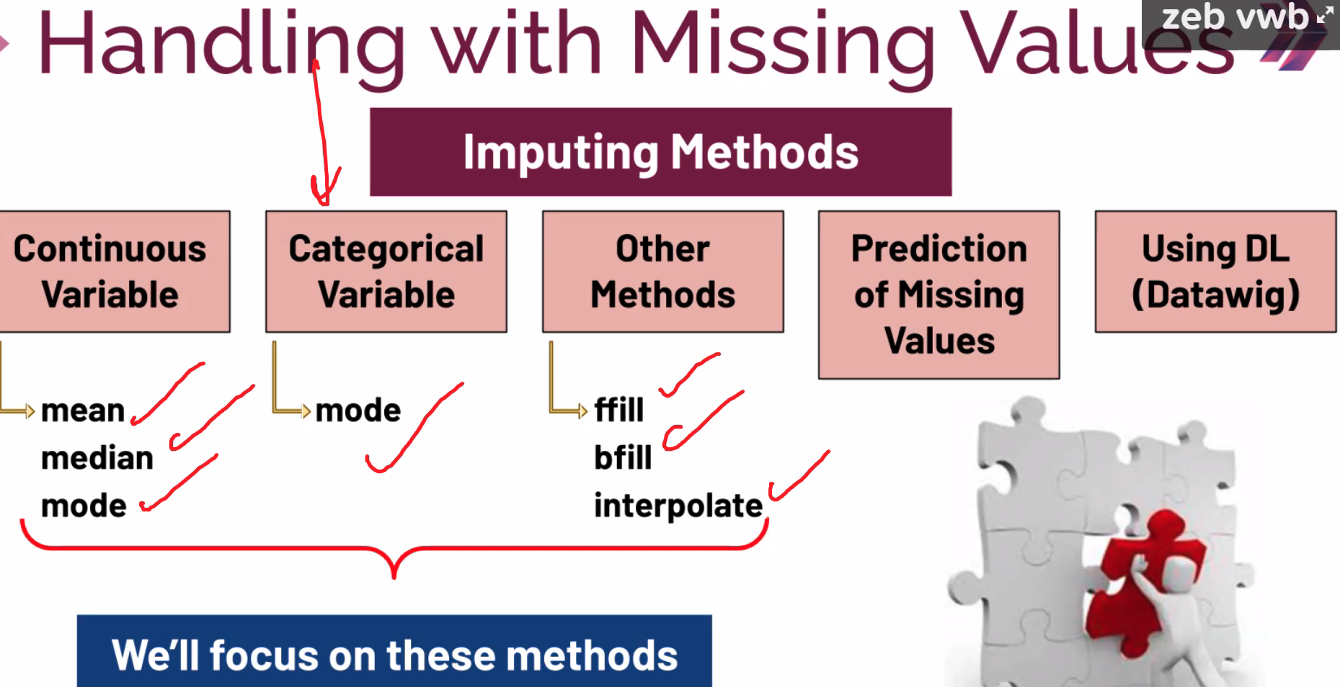

In [58]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


 ### a.Filling with a specific value

In [59]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,0
1,P002,1,PT,FS,3.0,0.0,54
2,P003,0,0,AWS,5.0,5.0,59
3,P004,1,FT,AWS,0.0,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,0,1.0,0.0,75
6,P007,0,FT,FS,0.0,0.0,0
7,P008,1,0,FS,10.0,2.0,136
8,P009,0,PT,0,14.0,3.0,60
9,P010,1,FT,DS,0.0,7.0,125


In [60]:
# dikkat = kücük nan'lar int 0, digerleri float 0 olmus
# var1 de ornek yapalım
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [61]:
df["var1"].dropna(0)

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_7167/3921632874.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  df["var1"].dropna(0)


0      2.0
1      3.0
2      5.0
4      7.0
5      1.0
7     10.0
8     14.0
10     6.0
Name: var1, dtype: float64

 ### b.Filling with any Proper Value

In [62]:
df["var1"].mean()

6.0

In [63]:
df["var1"].fillna(df["var1"].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [64]:
df["var1"].median()

5.5

In [65]:
df["var1"].fillna(df["var1"].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [66]:
df.mean()

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_7167/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


gender     0.454545
var1       6.000000
var2       6.625000
salary    85.875000
dtype: float64

In [67]:
# fillnayı tum dfe ugrayalım
df.fillna(df.mean())
# her sutunu kendi icindeki ortalamalarıyla degistirdi

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_7167/2423861709.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.000,85.875
1,P002,1,PT,FS,3.0,6.625,54.000
2,P003,0,NaN,AWS,5.0,5.000,59.000
3,P004,1,FT,AWS,6.0,8.000,120.000
4,P005,0,PT,DS,7.0,11.000,58.000
5,P006,1,PT,None,1.0,6.625,75.000
6,P007,0,FT,FS,6.0,6.625,85.875
7,P008,1,NaN,FS,10.0,2.000,136.000
8,P009,0,PT,NaN,14.0,3.000,60.000
9,P010,1,FT,DS,6.0,7.000,125.000


# sutunların ozellgine gore baze mean, median, modela doldurmak gerekir. o zaman su yontemi kulllanırız

In [69]:


df.fillna({"dept": "other", "var1": df.var1.mean(), "var2": df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,7.5,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,6.0,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,other,1.0,7.5,75
6,P007,0,FT,FS,6.0,7.5,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,other,14.0,3.0,60
9,P010,1,FT,DS,6.0,7.0,125


In [70]:
# 2 farklı sutunu kendi emanleriyle dolduralım
df.mean()[["var1", "var2"]]

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_7167/575805257.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()[["var1", "var2"]]


var1    6.000
var2    6.625
dtype: float64

In [109]:
df.fillna(df.mean()[["var1", "var2"]])

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_1052/1823722846.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df0.fillna(df0.mean()[["var1", "var2"]])


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.000,NaN
1,P002,1,PT,FS,3.0,6.625,54
2,P003,0,NaN,AWS,5.0,5.000,59
3,P004,1,FT,AWS,6.0,8.000,120
4,P005,0,PT,DS,7.0,11.000,58
5,P006,1,PT,None,1.0,6.625,75
6,P007,0,FT,FS,6.0,6.625,None
7,P008,1,NaN,FS,10.0,2.000,136
8,P009,0,PT,NaN,14.0,3.000,60
9,P010,1,FT,DS,6.0,7.000,125


**where() Replace values where the condition is False.**

In [71]:
# cok kullanılan bir yontem degil ama bilelim: icinde condition pramatersi var ve where fonksiyon conditiondan false
# dönenlere atama yapıp trueları bırakıyor
df.notna()  # örneğin notna na olmayanları true döndürür
# notna none degerlere false veriyor, where de iste bu false gorduklerine atama yapıyor

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [72]:
df.where(cond = df.notna(), other = df.mean(), axis = 1)

/var/folders/kd/j9mqrdy93j33xdby6bflbgt00000gn/T/ipykernel_7167/1044940381.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other = df.mean(), axis = 1)


,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.000,85.875
1,P002,1,PT,FS,3.0,6.625,54
2,P003,0,NaN,AWS,5.0,5.000,59
3,P004,1,FT,AWS,6.0,8.000,120
4,P005,0,PT,DS,7.0,11.000,58
5,P006,1,PT,NaN,1.0,6.625,75
6,P007,0,FT,FS,6.0,6.625,85.875
7,P008,1,NaN,FS,10.0,2.000,136
8,P009,0,PT,NaN,14.0,3.000,60
9,P010,1,FT,DS,6.0,7.000,125


**Fill NaN values using an interpolation method.**

In [73]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54
2,P003,0,NaN,AWS,5.0,5.0,59
3,P004,1,FT,AWS,NaN,8.0,120
4,P005,0,PT,DS,7.0,11.0,58
5,P006,1,PT,None,1.0,NaN,75
6,P007,0,FT,FS,NaN,NaN,None
7,P008,1,NaN,FS,10.0,2.0,136
8,P009,0,PT,NaN,14.0,3.0,60
9,P010,1,FT,DS,NaN,7.0,125


In [74]:
# object dtype olan salaryi kalıcı float yapalım
df.salary = df.salary.astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     int64  
 2   status  8 non-null      object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 744.0+ bytes


In [75]:
df.interpolate()
# ornegin var1-4. satır icin onceki ve sonraki degerileri alıp ortalamsını ona atiyor. 5+7 / 2 = 6

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,6.5,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,6.0,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,8.0,75.0
6,P007,0,FT,FS,5.5,5.0,105.5
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,10.0,7.0,125.0


In [ ]:
# var 2 ve 5-6 nan. once 11 sonra 2 var. araya esit bosluklar yapıyor. fark 11-8-5-2
# ama ilk ve son deger arasına deger atayabiliyor. salary 0 index oldugu gib atama yapamado. ya da status son

In [76]:
df.salary.dtype

dtype('float64')

In [ ]:
# numericler mean median vs ile dolar. kategorikler ise:

For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 ### c.Filling the Missing Values of Categorical Variables

In [77]:
# groupby kategorik verilere yapıldığı için ilk önce hep kategork verileri doldurmalıyız.
# numericlere sonra gecmek daha mantıklı
df
# status, dept, gender kategorik

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,None,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,NaN,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [78]:
df.dept.mode()
# 3ü de esit degerde tekrar eden 3 value, bu nednele birini alalım

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [79]:
df.dept.mode()[0]

'AWS'

In [80]:
df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
# bunu bfill metoduyla olduralım

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

In [81]:
df.dept.fillna(method="bfill")
# geriye dogru giderken nan oncesi ilk degerle dolduruyor

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [82]:
# ffill de forward ile dolduruyor
df.dept.fillna(method="ffill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [83]:
df.status.fillna(method= "pad")  # ffill

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

In [84]:
# birden fazla sutunu da aynı anda doldurabiliriz
df[["status", "dept"]].fillna(method= "ffill")

,status,dept
0,FT,DS
1,PT,FS
2,PT,AWS
3,FT,AWS
4,PT,DS
5,PT,DS
6,FT,FS
7,FT,FS
8,PT,FS
9,FT,DS


# modela doldurunca datanın genel oranını bozuyoruz, daha az bozma adına modedan ziyade bfill veya ffill dhaa mantıklı

 ### d.Filling by condition & by Group of the Categorical Variables 

In [85]:
# dept sutununu kalıcı dolduralım
df.dept.fillna(method= "ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [86]:
# status doldururken neye dikkat etmeliyim? burada data geneline bakarız. ornegin salarylere bakarak
# doldururuz. salary yuksekse muhtemelen full time, yoksa part timedır

# Missing value ları doldururken diğer sütunlar ile gruplamalar yapmak farklı
# insigt lar elde etmemize ve daha gerçekçi değerler üretmemize yardımcı olur.

df.loc[df["salary"] >= 100, ["status"]]
# 100den fazla kazanan bir kisi var, muhtemelen FT o

,status
3,FT
7,NaN
9,FT


In [87]:
df.loc[df["salary"] < 100, ["status"]]
# NaN muhtemelen Pt, diger hepsi buna isaret ediyor

,status
1,PT
2,NaN
4,PT
5,PT
8,PT


In [88]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df
# asagida yazdırdık degismemis yine, demekki inplace bazen fillnada calismiyor

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,NaN,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,NaN,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


In [92]:
# yukarıda bazı statusler bos halen, bu endenle atama ile yapalım. ama sadece ilgili satırlara atama yapacagiz

df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])

In [93]:
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])

In [94]:
df
# artık kalıcı
# geriye sadece her ikisnin de nan olduğu son satır kaldı

,id,gender,status,dept,var1,var2,salary
0,P001,0,FT,DS,2.0,8.0,NaN
1,P002,1,PT,FS,3.0,NaN,54.0
2,P003,0,PT,AWS,5.0,5.0,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0
4,P005,0,PT,DS,7.0,11.0,58.0
5,P006,1,PT,DS,1.0,NaN,75.0
6,P007,0,FT,FS,NaN,NaN,NaN
7,P008,1,FT,FS,10.0,2.0,136.0
8,P009,0,PT,FS,14.0,3.0,60.0
9,P010,1,FT,DS,NaN,7.0,125.0


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [95]:
df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0])
# gender ve departman arası iliki olabilir mi bakalım

gender  dept
0       AWS     PT
        DS      FT
        FS      FT
1       AWS     FT
        DS      FT
        FS      FT
Name: status, dtype: object

In [96]:
# transform ile hangi satır ft hangi satır pt , yani grup uyeligine gore modeları gorelim
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

Since the transform() method returns the same length as input it is more logical to use the transform() method for feature engineering rather than using the apply() method. Otherwise, you will get NaN values in the new feature you created with apply() method. So the transform() method will be used to fill missing values in the DataFame.

In [97]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,0,FT,DS,2.0,8.0,NaN,FT
1,P002,1,PT,FS,3.0,NaN,54.0,FT
2,P003,0,PT,AWS,5.0,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7.0,11.0,58.0,FT
5,P006,1,PT,DS,1.0,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10.0,2.0,136.0,FT
8,P009,0,PT,FS,14.0,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


In [ ]:
# groupbyda male aws parttime'dı. dolayısyla en son NaN'ı PT ile doldurmak daha mantıklı yani. 
# doldururken sadece son satırı doldurur fillna dedigimiz icin. bos satıra bakar cunku

In [98]:
df.status.fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]))

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    PT
Name: status, dtype: object

In [99]:
df.groupby(["gender", "dept"])["status"].apply(lambda x: x.mode()).index

MultiIndex([(0, 'AWS', 0),
            (0,  'DS', 0),
            (0,  'DS', 1),
            (0,  'FS', 0),
            (0,  'FS', 1),
            (1, 'AWS', 0),
            (1,  'DS', 0),
            (1,  'DS', 1),
            (1,  'FS', 0),
            (1,  'FS', 1)],
           names=['gender', 'dept', None])

**``Special Note:``** The index of df was RangeIndex(start=0, stop=2, step=1). Therefore, RangeIndex vs MultiIndex mismatach caused the issue.

df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()).index

**How to solve MultiIndex issue while using groupby() and apply()?**

You can groupy the 'gender' and 'dept' columns and then call apply on the df groupby object and pass the function mode. We can then call reset_index and pass param drop=True so that the multi-index is not added back as a column as you already have those columns:

[How to group by mode in python?](https://stackoverflow.com/questions/30216921/how-to-group-by-mode-in-python)

In [100]:
# Second Approach: If you  get "ValueError 1 is not in range The above exception was the direct cause of 
# the following exception" while indexing, apply reset_index(drop=True) for the problem  

df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0]).reset_index(drop=True)

0    PT
1    FT
2    FT
3    FT
4    FT
5    FT
Name: status, dtype: object

In [101]:
df.groupby(["gender", "dept"])["status"].transform(lambda x: pd.Series.mode(x)[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [102]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]).reset_index(drop=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,0,FT,DS,2.0,8.0,NaN,FT
1,P002,1,PT,FS,3.0,NaN,54.0,FT
2,P003,0,PT,AWS,5.0,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7.0,11.0,58.0,FT
5,P006,1,PT,DS,1.0,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10.0,2.0,136.0,FT
8,P009,0,PT,FS,14.0,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


In [103]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].
                    transform(lambda x : x.mode()[0]).reset_index(drop=True), inplace=True)

# df["status"].fillna(df["trans_status"], inplace=True)
df

# We used the values we obtained with the transform method to fill the null values.

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,0,FT,DS,2.0,8.0,NaN,FT
1,P002,1,PT,FS,3.0,NaN,54.0,FT
2,P003,0,PT,AWS,5.0,5.0,59.0,PT
3,P004,1,FT,AWS,NaN,8.0,120.0,FT
4,P005,0,PT,DS,7.0,11.0,58.0,FT
5,P006,1,PT,DS,1.0,NaN,75.0,FT
6,P007,0,FT,FS,NaN,NaN,NaN,FT
7,P008,1,FT,FS,10.0,2.0,136.0,FT
8,P009,0,PT,FS,14.0,3.0,60.0,FT
9,P010,1,FT,DS,NaN,7.0,125.0,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [104]:
# Let us examine the average of "salary" in terms of "department"

df.groupby("dept")["salary"].mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [105]:
# Let us examine the average of "salary" in terms of "department" and "status"

df.groupby(["status", "dept"])["salary"].mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [106]:
# Let's use the transform() method again to find the average salary of the groups according to status and dept in consistent with df length.

df.groupby(["status", "dept"])["salary"].transform("mean")

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [107]:
df["trans_salary"] = df.groupby(["status","dept"])["salary"].transform("mean")
df

# For a better understanding of which value will be used for filling, we created a new feature using transform() method 
# demonstrating the average salary of the groups according to status and department.

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,NaN,NaN,NaN,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0


In [108]:
# Now it's time to fill missing values in the "salary" column by the average salary of the groups according to status and department

df["salary"].fillna(df.groupby(["status", "dept"])["salary"].transform("mean"), inplace=True)
# df["salary"].fillna(df["trans_salary"], inplace=True)

df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**


In [117]:
# Let us first check the average value for "var1" according to "gender"

df.groupby("gender")["var1"].mean()

gender
0    6.800000
1    4.666667
Name: var1, dtype: float64

In [118]:
# Then let's examine the average value for "var1" according to "gender" and "status"
# Using these values seems more appropriate for the ordinary course of life.

df.groupby(["gender", "status"])["var1"].mean()

gender  status
0       FT         2.0
        PT         8.0
1       FT        10.0
        PT         2.0
Name: var1, dtype: float64

In [119]:
df.groupby(["gender","status"])["var1"].transform("mean")

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [120]:
trans_var1 = df.groupby(["gender", "status"])["var1"].transform("mean")
trans_var1

# We created an object to use while filling missing values in the "var1" column 
# with the average value according to gender and status.

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [121]:
df["var1"].fillna(trans_var1, inplace=True)
df

# We filled the missing values permanently in the "var1" column with the average value according to gender and status.

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,1,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,10.0,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,0,FT,FS,2.0,NaN,136.0,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,10.0,7.0,125.0,FT,125.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [122]:
df.var2

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [123]:
trans_var2 = df.groupby(["status"])["var2"].mean()
trans_var2

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [124]:
trans_var2 = df.groupby(["status", "dept"])["var2"].mean()
trans_var2

status  dept
FT      AWS      8.0
        DS       7.5
        FS       2.0
PT      AWS      7.0
        DS      11.0
        FS       3.0
Name: var2, dtype: float64

In [125]:
trans_var2 = df.groupby(["status", "dept"])["var2"].transform("mean")


In [126]:
df["var2"].fillna(trans_var2, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,0,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,1,PT,FS,3.0,3.0,54.0,FT,57.0
2,P003,0,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,1,FT,AWS,10.0,8.0,120.0,FT,120.0
4,P005,0,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,1,PT,DS,1.0,11.0,75.0,FT,66.5
6,P007,0,FT,FS,2.0,2.0,136.0,FT,136.0
7,P008,1,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,0,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,1,FT,DS,10.0,7.0,125.0,FT,125.0


# missing value doldururken eger type hatası alıyorsak (orn sayısal sutunda kucuk bir str kalmıs) sutunu kontrol etmeliyiz

### e.Filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [167]:
flights = sns.load_dataset("flights")

In [168]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

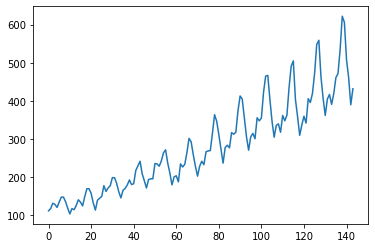

In [169]:
flights.passengers.plot();

In [170]:
# nan degerler ekleyelim islem yapmak icin df'in bir copysinde
flights_copy = flights.copy()

In [174]:
# loc ile bazı yerleri secip manipule edelim
# random randint ile bazı indeksler, secebilriiz
flights_copy.loc[np.random.randint(1,144,20), ["passengers"]]

,passengers
87,313
143,432
72,242
22,114
69,229
16,125
109,318
68,259
142,390
62,235


In [177]:
# bunları nan yapalım
flights_copy.loc[np.random.randint(1,144,20), ["passengers"]] = np.nan
flights_copy.sample(9)

,year,month,passengers
121,1959,Feb,NaN
71,1954,Dec,229.0
64,1954,May,234.0
123,1959,Apr,NaN
59,1953,Dec,201.0
134,1960,Mar,419.0
68,1954,Sep,NaN
74,1955,Mar,267.0
18,1950,Jul,170.0


In [178]:
flights_copy.isnull().sum()

year           0
month          0
passengers    50
dtype: int64

<AxesSubplot:>

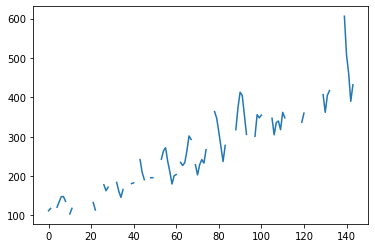

In [179]:
flights_copy.passengers.plot()
# aralardaki kesiklikler nanlar

In [180]:
flights_copy.passengers.interpolate()

0      112.0
1      118.0
2      119.0
3      120.0
4      121.0
       ...  
139    606.0
140    508.0
141    461.0
142    390.0
143    432.0
Name: passengers, Length: 144, dtype: float64

<AxesSubplot:>

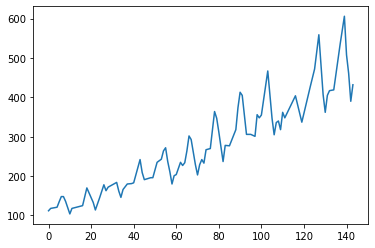

In [181]:
flights_copy.passengers.interpolate().plot()

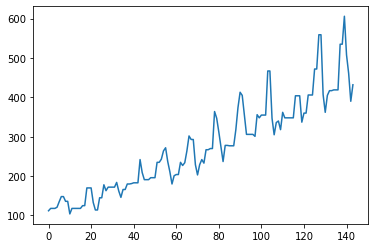

In [184]:
# bunu ffill ile dodluralim
flights_copy.passengers.fillna(method="ffill").plot(kind = "line");
# default da line zaten

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>